In [2]:
# This program classifies patients as having chronic kidney disease (cdk) or not, using Artificial Neural Networks
# https://www.youtube.com/watch?v=uxMvHSUOZzc
# Data from Kaggle Database https://www.kaggle.com/mansoordaku/ckdisease
# Data originally in https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease


# requires Tensorflow

In [21]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
import os
%matplotlib inline

In [8]:
#Load the Data
data_path = 'datasets\kidney\kidney_disease.csv'
df = pd.read_csv(os.path.join(os.getcwd(),data_path), sep=',')

In [10]:
print(df.head(4))
# The data column headers signify 
# age - age
# bp - blood pressure
# sg - specific gravity
# al - albumin
# su - sugar
# rbc - red blood cells
# pc - pus cell
# pcc - pus cell clumps
# ba - bacteria
# bgr - blood glucose random
# bu - blood urea
# sc - serum creatinine
# sod - sodium
# pot - potassium
# hemo - hemoglobin
# pcv - packed cell volume
# wc - white blood cell count
# rc - red blood cell count
# htn - hypertension
# dm - diabetes mellitus
# cad - coronary artery disease
# appet - appetite
# pe - pedal edema
# ane - anemia
# class - classification, DEPENDENT VARIABLE either as having or not having cdk

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  

[4 rows x 26 columns]


In [16]:
# get the shaope of the data
print(df.shape)
print(df.columns)

(400, 26)
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


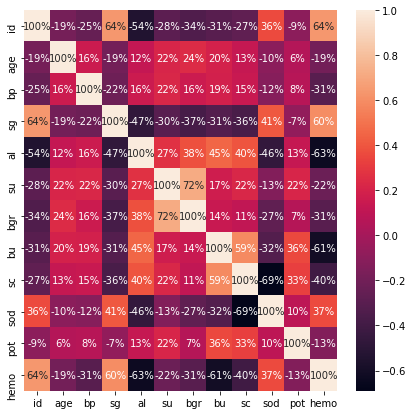

In [15]:
#Explore a bit the correlation between the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

In [19]:
# There is some very high correlations between data, so we are only keeping some of the columns
# Create a list of column names to keep
columns_to_retain = ['sg','al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

# Here we drop the columns that are not in the columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)

# Drop also the rows with Na or missing values
df = df.dropna(axis=0)
print(df.shape)

(287, 7)


In [23]:
# Transform the non-numeric data in the columns
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    else:
        df[column] = LabelEncoder().fit_transform(df[column])

In [24]:
# Print the first 5 rows of the dataframe
print(df.head(5))

      sg   al   sc  hemo  pcv  htn  classification
0  1.020  1.0  1.2  15.4   28    1               0
1  1.020  4.0  0.8  11.3   22    0               0
2  1.010  2.0  1.8   9.6   15    0               0
3  1.005  4.0  3.8  11.2   16    1               0
4  1.010  2.0  1.4  11.6   19    0               0


In [25]:
# Split the data into independent features (X) and Dependent target (y) sets

X = df.drop(['classification'], axis =1) 
# the uindication that we want to drop the column is axis=1
# if we wanted to drop the row, we need axis=0

y = df['classification']

In [26]:
# Here we do the feature scaling (have all the input features be between 0 and 1)
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names]=x_scaler.transform(X)

In [27]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) # we shuffle the data also before splitting

In [77]:
# Build a model using the Sequential Method
model = Sequential()
model.add(Dense(3, input_dim = len(X.columns), kernel_initializer = k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [78]:
# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics =['accuracy'])

In [79]:
# Train the model 
history = model.fit(X_train, y_train, epochs = 2000, verbose=0, batch_size = X_train.shape[0]) 
# verbose=0 parameter requires silent progress 
# see https://keras.io/models/model/

In [80]:
# Save the model
model.save('cdk.model')

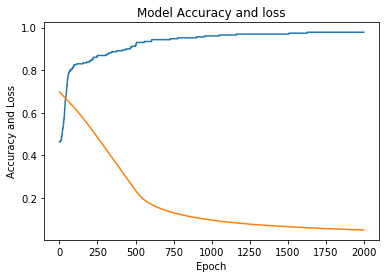

In [81]:
# Visualize the model's loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.show()

In [82]:
# see the shape of the data
print('shape of training data:', X_train.shape)
print('shape of test data:', X_test.shape)

shape of training data: (229, 6)
shape of test data: (58, 6)


In [83]:
# Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y>0.5 else 0 for y in pred]

print('Original: {0}'.format(",".join(str(x) for x in y_test)))
print('Predict: {0}'.format(",".join(str(x) for x in pred)))

Original: 0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1
Predict: 0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,1


In [84]:
# let us create the confusion matrix for this output
#test model accuracy in the test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

# Print the confuision Matrix
print(cm)

#Print the model accuracy
print('Model Accuracy = {}'.format((TN+TP)/(TN+TP+FN+FP)))

[[29  0]
 [ 0 29]]
Model Accuracy = 1.0
